<a href="https://colab.research.google.com/github/Codesmith900/Homography_in_video/blob/main/Homographyvideo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homography for Video Warping**

Rakshya(03) and Prarthana(04)

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import transform

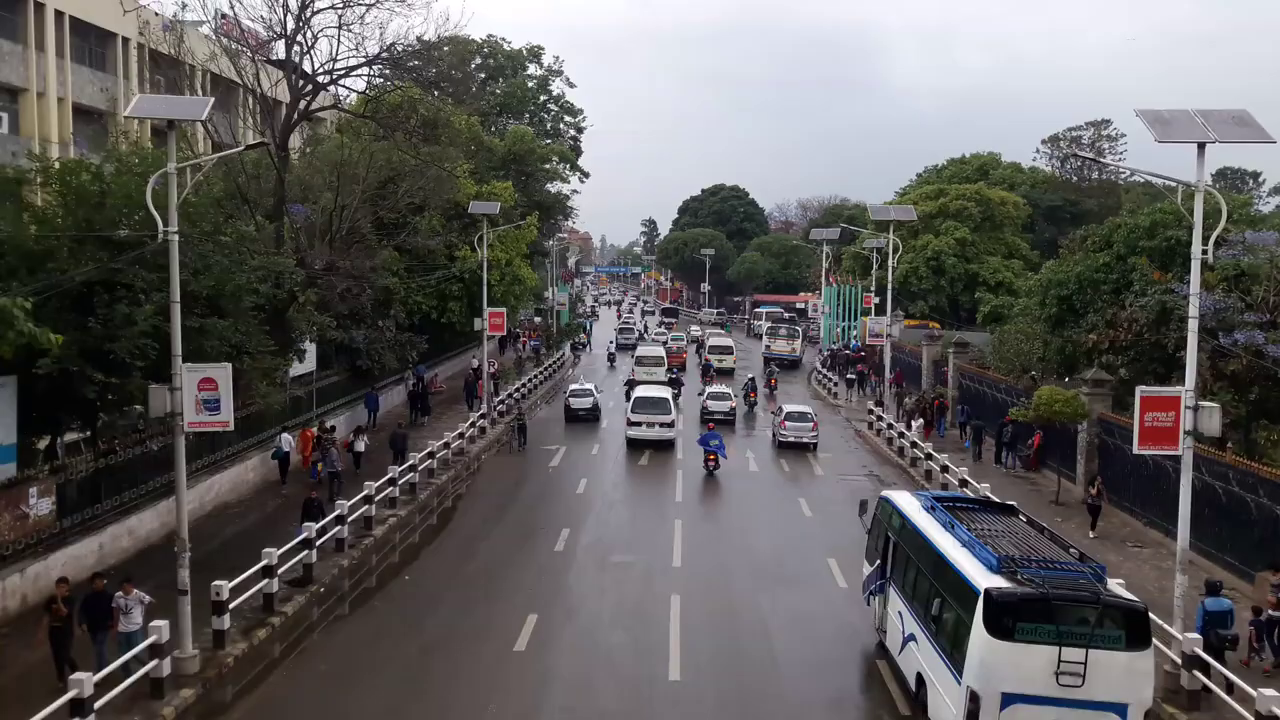

In [ ]:
# Read the video
video = cv2.VideoCapture('/content/yt5s.io-Ratnapark __ Kathmandu __ NEPAL.mp4')

#Read a frame from the video
ret, frame = video.read()

#Display the selected frame
cv2_imshow(frame)

Define the source plane and the destination plane from the original image

In [ ]:
area_of_interest = np.array([[0,0], [1280,0], [1280, 700], [0, 700]])
area_of_projection = np.array([[100,100], [1000,100], [1000, 500], [200, 600]])

Plot the vertices of the area_of_interest on the image(also displays the shape of the area_of_projection plane)

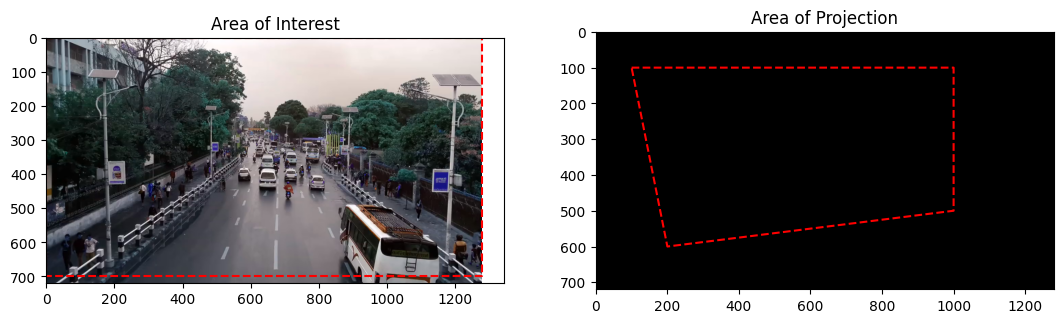

In [ ]:
def project_planes(frame, src, dst):
    x_src = [val[0] for val in src] + [src[0][0]]
    y_src = [val[1] for val in src] + [src[0][1]]
    x_dst = [val[0] for val in dst] + [dst[0][0]]
    y_dst = [val[1] for val in dst] + [dst[0][1]]

    fig, ax = plt.subplots(1,2, figsize=(13,6))

    new_image = frame.copy()
    projection = np.zeros_like(new_image)
    ax[0].imshow(new_image);
    ax[0].plot(x_src, y_src, 'r--')
    ax[0].set_title('Area of Interest')
    ax[1].imshow(projection)
    ax[1].plot(x_dst, y_dst, 'r--')
    ax[1].set_title('Area of Projection')
project_planes(frame, area_of_interest, area_of_projection)

Warp the area of interest to fit the area of projection

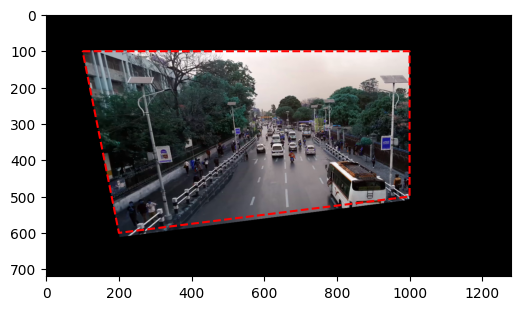

In [ ]:
def project_transform(frame, src, dst):
    x_dst = [val[0] for val in dst] + [dst[0][0]]
    y_dst = [val[1] for val in dst] + [dst[0][1]]

    tform = transform.estimate_transform('projective',
                                         np.array(src),
                                         np.array(dst))
    transformed = transform.warp(frame, tform.inverse)

    plt.figure(figsize=(6,6))
    plt.imshow(transformed)
    plt.plot(x_dst, y_dst, 'r--')
project_transform(frame, area_of_interest, area_of_projection)

**VIDEO FRAME STITCHING**

 SIFT for feature detection and extraction

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

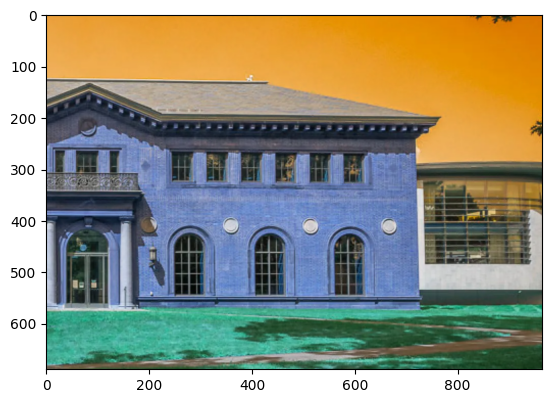

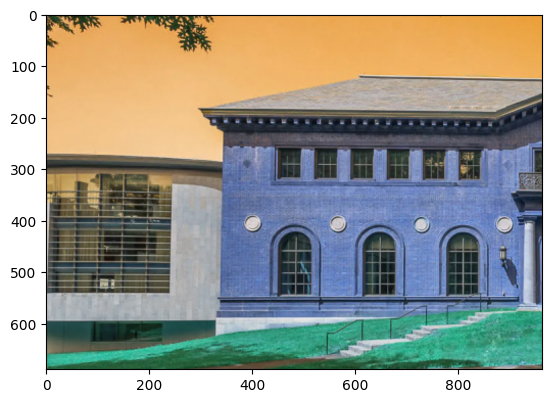

In [ ]:
img_1 = cv2.imread('/content/2.png')
plt.imshow(img_1)
plt.show()
img_2 = cv2.imread('/content/1.png')
plt.imshow(img_2)
plt.show()

Convert to greayscale

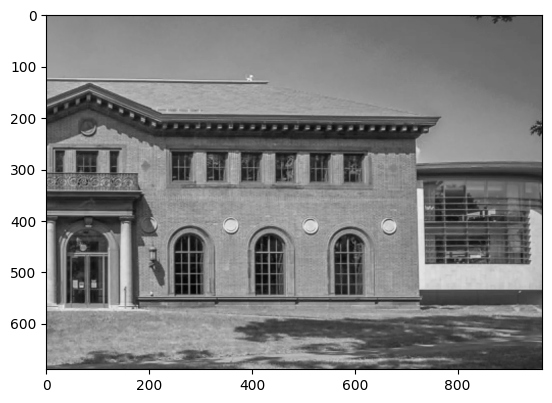

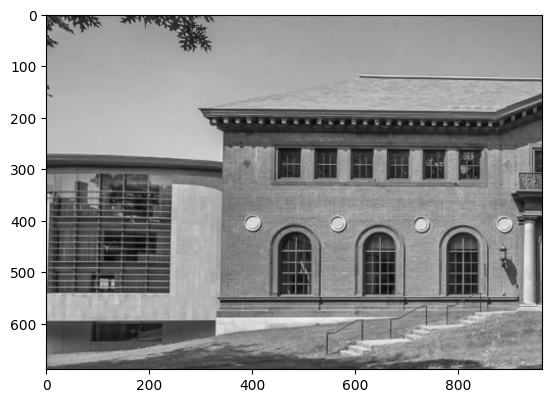

In [ ]:
img1 = cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)
plt.imshow(img1, cmap='gray')
plt.show()
img2 = cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)
plt.imshow(img2, cmap='gray')
plt.show()

Feature detection and extraction

In [ ]:
#Iniitialize SIFT and compute key points and discriptors
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

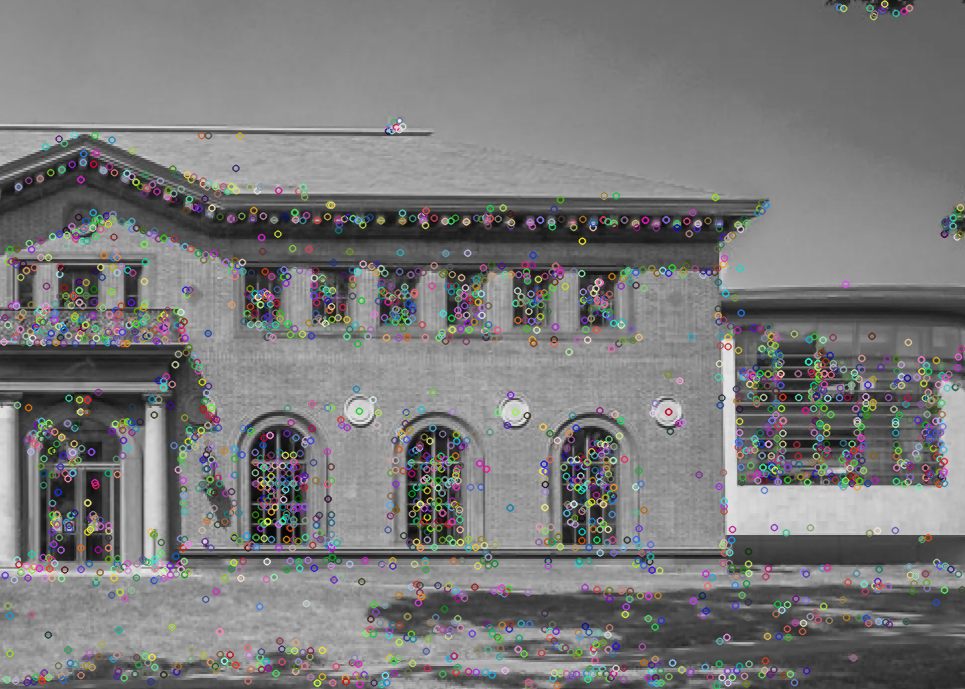

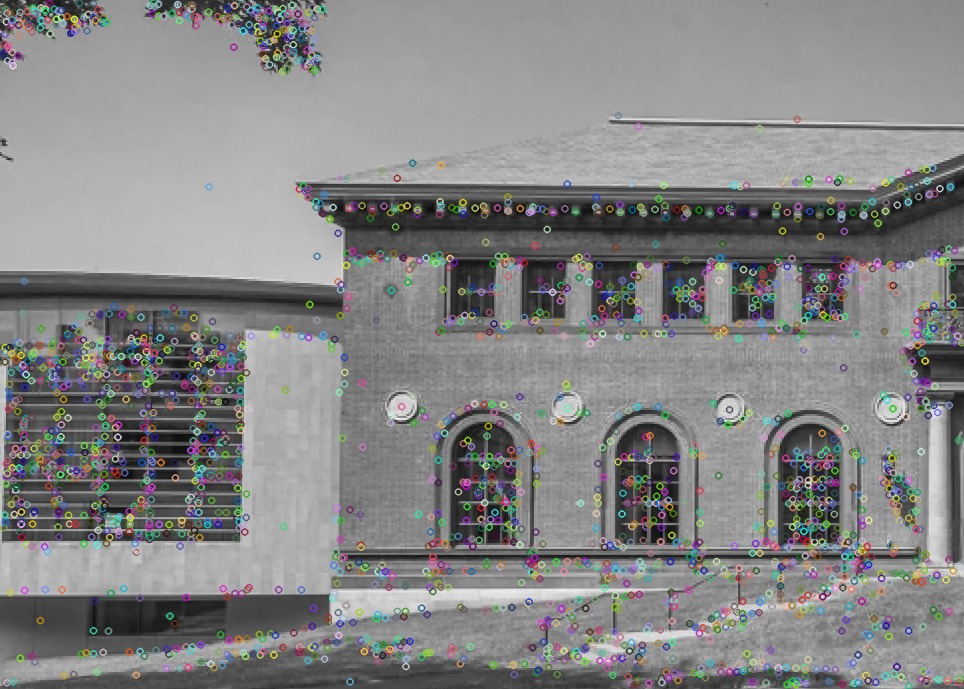

In [ ]:
# Draw keypoints on the images
img1_with_kp = cv2.drawKeypoints(img1, kp1, None)
img2_with_kp = cv2.drawKeypoints(img2, kp2, None)

# Display the images with keypoints
cv2_imshow(img1_with_kp)
cv2_imshow(img2_with_kp)
cv2.waitKey(0)
cv2.destroyAllWindows()

bf = cv2.BFMatcher()

Feature Matching

In [ ]:
bf = cv2.BFMatcher()


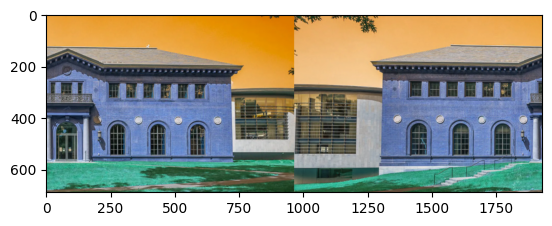

In [ ]:
# Draw matches
img_matches = cv2.drawMatchesKnn(img_1, kp1, img_2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img_matches)
plt.show()

In [ ]:
#Perform KNN matching using brute force matcher
matches = bf.knnMatch(des1,des2, k=2)

In [ ]:
#Filter matches based on distance ratio and convert them to a NumPy array
good = []
for m in matches:
    if (m[0].distance < 0.5*m[1].distance):
        good.append(m)
matches = np.asarray(good)

Homography Calculation

In [ ]:
#Calculates homography if enough matches are found; otherwise, raises an error
if (len(matches[:,0]) >= 4):
    src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
else:
    raise AssertionError('Can’t find enough keypoints.')

Warping

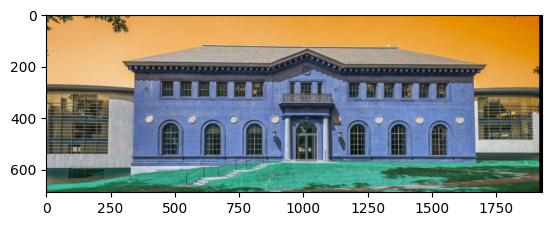

In [ ]:
#Warps the first image, combines it with the second
dst = cv2.warpPerspective(img_1,H,((img_1.shape[1] + img_2.shape[1]), img_2.shape[0])) #wraped image
dst[0:img_2.shape[0], 0:img_2.shape[1]] = img_2 #stitched image
cv2.imwrite('output.jpg',dst)
plt.imshow(dst)
plt.show()